In [4]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [5]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [6]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [7]:
def compute_loss2(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
        # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    return (1/(2 * (tx.shape[0])) * np.sum((y - tx @ w.T)**2))

In [8]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
        # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************    
    return (1/(2 * (tx.shape[0]))) * np.sum(np.abs((y - tx @ w.T)))


In [9]:
w = np.array([1,2])
compute_loss(y, tx, w)

36.14696100105259

# 2 Grid Search

Fill in the function `grid_search()` below:

In [10]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for i, wi in enumerate(w0):
        for j, wj in enumerate(w1):
            losses[i][j] = compute_loss(y, tx, np.array([wi, wj]))
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=2.4368285589459338, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.369 seconds


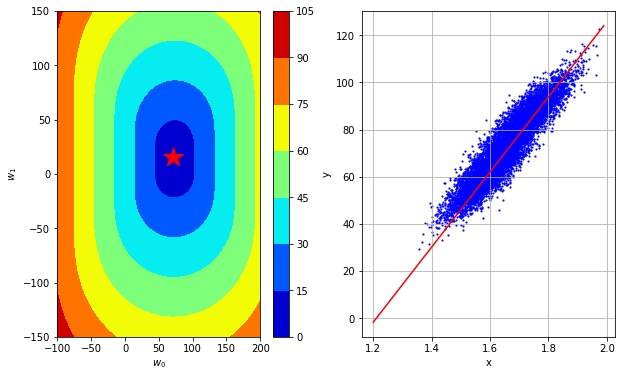

In [11]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [12]:
def compute_gradient2(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and error vector
    # ***************************************************
    return (-1 / tx.shape[0]) * (tx.T @ (y - tx @ w.T))

In [13]:
def compute_gradient(y, tx, w):
    dist = (y - tx @ w.T)
    dist[dist < 0] = -1
    dist[dist > 0] = 1
    return 1/(- 2 * (tx.shape[0])) * np.sum(dist[:, np.newaxis] * tx, axis=0)

In [14]:
compute_gradient(y, tx, np.array([100,20]))

array([0.499     , 0.00207403])

Please fill in the functions `gradient_descent` below:

In [15]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w] 
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss = compute_gradient(y, tx, w)        
        w = w - gamma * loss
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [23]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 100
gamma = 40 

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
#print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/99): loss=[-5.00000000e-01  1.10926823e-15], w0=20.0, w1=-4.437072931295916e-14
Gradient Descent(1/99): loss=[-5.00000000e-01  1.10926823e-15], w0=40.0, w1=-8.874145862591831e-14
Gradient Descent(2/99): loss=[-0.4976     -0.00578179], w0=59.904, w1=0.2312716937908069
Gradient Descent(3/99): loss=[-0.2956     -0.25562846], w0=71.72800000000001, w1=10.45641007438285
Gradient Descent(4/99): loss=[-0.0875     -0.22171823], w0=75.22800000000001, w1=19.325139407363636
Gradient Descent(5/99): loss=[0.0989     0.27881302], w0=71.272, w1=8.172618416413307
Gradient Descent(6/99): loss=[-0.0827     -0.30143723], w0=74.58000000000001, w1=20.23010750934785
Gradient Descent(7/99): loss=[0.0622     0.30315345], w0=72.09200000000001, w1=8.103969578156452
Gradient Descent(8/99): loss=[-0.0497    -0.3146555], w0=74.08000000000001, w1=20.690189500773684
Gradient Descent(9/99): loss=[0.034      0.31713604], w0=72.72000000000001, w1=8.004747861186875
Gradient Descent(10/99): loss=[-0.025

In [24]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=101, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [18]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    return compute_gradient(y_s, x_s, w)


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        for y_s, x_s in batch_iter(y, tx, batch_size):
            loss = compute_gradient(y_s, x_s, w)
            w = w - gamma * loss
            # store w and loss
            ws.append(w)
            losses.append(loss)
            print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
                  bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws


In [19]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 10
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=[-0.5        -0.48727361], w0=5.0, w1=4.87273613168725
Gradient Descent(1/49): loss=[-0.5         0.01729929], w0=10.0, w1=4.699743214873264
Gradient Descent(2/49): loss=[-0.5         0.40880921], w0=15.0, w1=0.6116511186739597
Gradient Descent(3/49): loss=[-0.5         0.40231306], w0=20.0, w1=-3.411479447057828
Gradient Descent(4/49): loss=[-0.5        -0.33781014], w0=25.0, w1=-0.03337802635743081
Gradient Descent(5/49): loss=[-0.5        0.2435872], w0=30.0, w1=-2.469250047963739
Gradient Descent(6/49): loss=[-0.5         0.45691807], w0=35.0, w1=-7.038430751608786
Gradient Descent(7/49): loss=[-0.5         0.67164803], w0=40.0, w1=-13.754911054685756
Gradient Descent(8/49): loss=[-0.5        -0.68029819], w0=45.0, w1=-6.951929194786055
Gradient Descent(9/49): loss=[-0.5        -0.09858456], w0=50.0, w1=-5.9660835459262245
Gradient Descent(10/49): loss=[-0.5         0.17626577], w0=55.0, w1=-7.728741242484604
Gradient Descent(11/49): loss=[ 0.5        -

In [20]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=101, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [2]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
        # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    dist = (y - tx @ w.T)
    dist[dist == 0] = np.random.rand(1,) * 2 - 1
    return (1/(2 * (tx.shape[0])) * np.sum(dist**2))
